<a href="https://colab.research.google.com/github/agamthind96/Deep-Learning-Projects/blob/main/Incident_Impact_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our task is to predict the impact of the incident raised by the customer.

## Import the necessary libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the training file and have a look at first 5 records of it

In [337]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Incident_management_train_data.csv")
train_df.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?


#### Find total number of records in train file

In [338]:
len(train_df)

99198

In [339]:
len(train_df.columns)

26

#### Shape of train file


In [340]:
train_df.shape

(99198, 26)

#### Types of columns names

In [341]:
train_df.dtypes

Unnamed: 0             int64
ID                    object
ID_status             object
active                  bool
count_reassign         int64
count_opening          int64
count_updated          int64
ID_caller             object
opened_by             object
opened_time           object
Created_by            object
created_at            object
updated_by            object
updated_at            object
type_contact          object
location              object
category_ID           object
user_symptom          object
Support_group         object
support_incharge      object
Doc_knowledge           bool
confirmation_check      bool
impact                object
notify                object
problem_ID            object
change_request        object
dtype: object

In [342]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          99198 non-null  int64 
 1   ID                  99198 non-null  object
 2   ID_status           99198 non-null  object
 3   active              99198 non-null  bool  
 4   count_reassign      99198 non-null  int64 
 5   count_opening       99198 non-null  int64 
 6   count_updated       99198 non-null  int64 
 7   ID_caller           99198 non-null  object
 8   opened_by           99198 non-null  object
 9   opened_time         99198 non-null  object
 10  Created_by          99198 non-null  object
 11  created_at          99198 non-null  object
 12  updated_by          99198 non-null  object
 13  updated_at          99198 non-null  object
 14  type_contact        99198 non-null  object
 15  location            99198 non-null  object
 16  category_ID         99

#### Identify unusual columns

In [343]:
unusual_columns = train_df[["support_incharge","problem_ID","change_request"]]
unusual_columns.head()

,support_incharge,problem_ID,change_request
0,?,?,?
1,?,?,?
2,?,?,?
3,Resolver 31,?,?
4,Resolver 31,?,?


In [344]:
unusual_columns["support_incharge"].value_counts()

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
                ...  
Resolver 131        1
Resolver 220        1
Resolver 38         1
Resolver 67         1
Resolver 102        1
Name: support_incharge, Length: 232, dtype: int64

In [345]:
unusual_columns["problem_ID"].value_counts()

?                  97620
Problem ID  14       114
Problem ID  2        112
Problem ID  52        55
Problem ID  239       35
                   ...  
Problem ID  178        1
Problem ID  136        1
Problem ID  143        1
Problem ID  62         1
Problem ID  229        1
Name: problem_ID, Length: 242, dtype: int64

**problem_ID** column seems to be of no use as there are 97620 undefined values in it.

In [346]:
unusual_columns["change_request"].value_counts()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000342       12
CHG0000047       12
              ...  
CHG0003305        1
CHG0001389        1
CHG0000648        1
CHG0001831        1
CHG0000534        1
Name: change_request, Length: 178, dtype: int64

**change_request** column also seems to be of no use as there are 98512 undefined values in it.

So, dropping **problem_ID** and **change_request** columns from our dataset

In [347]:
train_df.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?


### Dropping unnecessary columns from our dataset.

In [348]:
train_df = train_df.drop(["Unnamed: 0","change_request","problem_ID"], axis=1)
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify


#### Let's deal with **support_incharge** column of our dataset.

In [349]:
train_df["support_incharge"].value_counts()

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
                ...  
Resolver 131        1
Resolver 220        1
Resolver 38         1
Resolver 67         1
Resolver 102        1
Name: support_incharge, Length: 232, dtype: int64

Since we can't decide which value to put here, so we will remove this column also from our dataframe.

In [350]:
train_df = train_df.drop("support_incharge", axis=1)
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify


Let's get some staistics values for our data to get better analysis of it.

In [351]:
train_df.describe()

,count_reassign,count_opening,count_updated
count,99198.000000,99198.000000,99198.000000
mean,1.110426,0.022289,5.096857
std,1.751588,0.211605,7.748275
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,128.000000


Let's do some analysis by coparing independent variables with dependent variable

In [352]:
pd.crosstab(train_df.ID_status, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
ID_status,,,
-100,0,2,0
Active,678,25684,713
Awaiting Evidence,4,21,1
Awaiting Problem,22,258,27
Awaiting User Info,171,9717,347
Awaiting Vendor,18,471,4
Closed,283,16578,526
New,868,24055,592
Resolved,400,17248,510


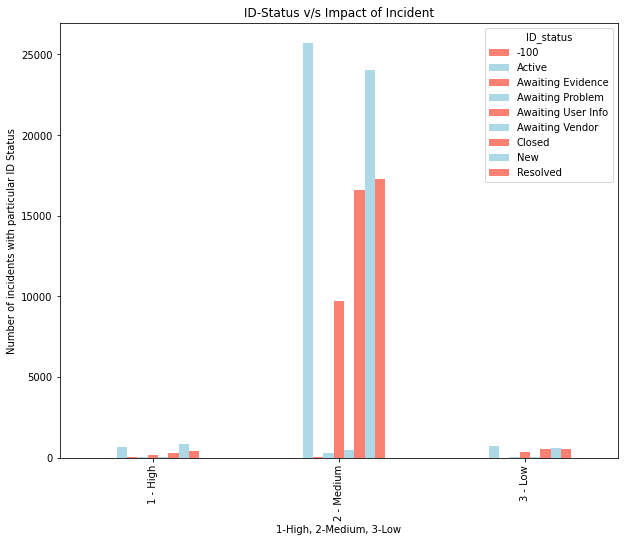

In [353]:
pd.crosstab(train_df.impact, train_df.ID_status).plot(kind="bar",
                                                      figsize=(10,8),
                                                      color=["salmon","lightblue"])

plt.title("ID-Status v/s Impact of Incident")
plt.xlabel("1-High, 2-Medium, 3-Low")
plt.ylabel("Number of incidents with particular ID Status");

It can be visualized from plot the the incident are generally raised with medium-impact in all ID_status.

In [354]:
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify


In [355]:
train_df["count_reassign"].value_counts()

0     48853
1     26027
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
20       13
15       13
18       11
17       11
16        9
19        7
22        6
23        2
26        2
24        1
25        1
27        1
21        1
Name: count_reassign, dtype: int64

#### Comparing the count reassign column with Impact column.

In [356]:
pd.crosstab(train_df.count_reassign, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
count_reassign,,,
0,1031,46329,1493
1,684,24726,617
2,318,9934,251
3,148,5483,146
4,78,3084,82
5,55,1727,48
6,44,957,16
7,33,640,19
8,15,380,11


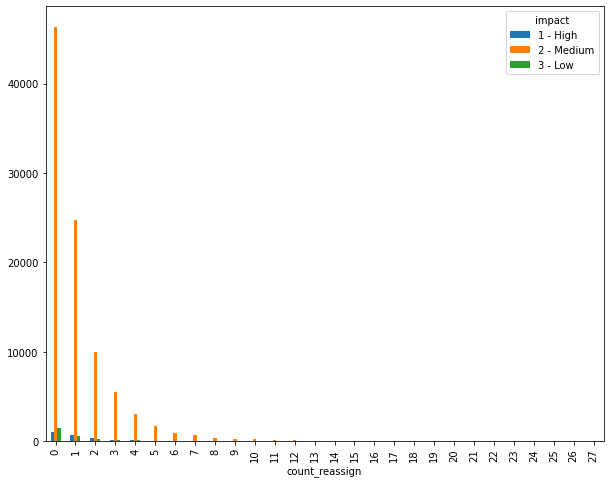

In [357]:
pd.crosstab(train_df.count_reassign, train_df.impact).plot(kind="bar",
                                                           figsize=(10,8));

It shows that most of the incident are never reassigned.

In [358]:
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify


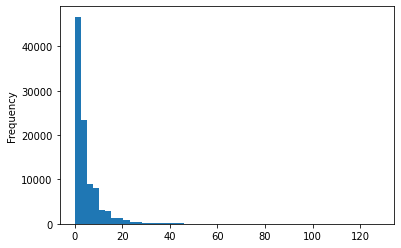

In [359]:
train_df["count_updated"].plot.hist(bins=50);

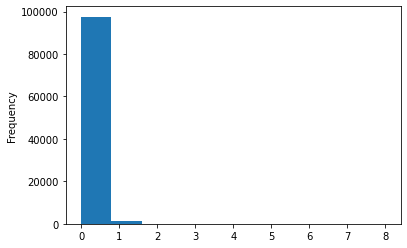

In [360]:
train_df["count_opening"].plot.hist();

It can be inferred from above two hist plots that frequencies of **count_updated** and **count_opening** in incidents is mostly 0.

In [361]:
pd.crosstab(train_df.active,train_df.impact)

impact,1 - High,2 - Medium,3 - Low
active,,,
False,283,16579,526
True,2161,77455,2194


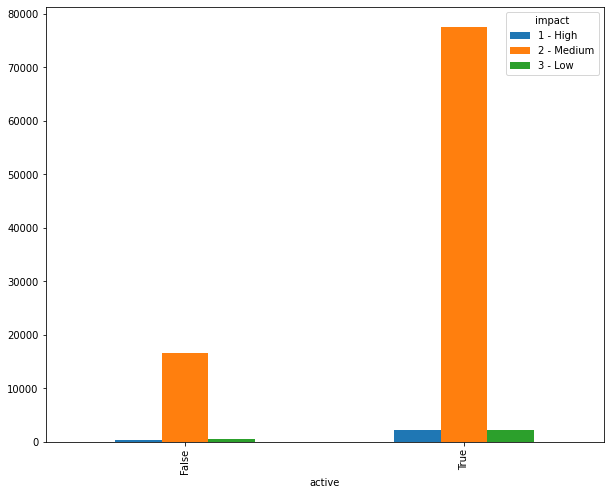

In [362]:
pd.crosstab(train_df.active, train_df.impact).plot(kind="bar",
                                                   figsize=(10,8));

In [363]:
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,updated_at,type_contact,location,category_ID,user_symptom,Support_group,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,...,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,...,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,True,False,2 - Medium,Do Not Notify


In [364]:
train_df["ID_caller"].value_counts()

Caller 1904    1001
Caller 290      552
Caller 4514     496
Caller 1441     218
Caller 298      203
               ... 
Caller 1527       1
Caller 4969       1
Caller 933        1
Caller 195        1
Caller 1899       1
Name: ID_caller, Length: 5223, dtype: int64

Since ID_caller columns has 5523 different types of values, so thsi columns may not be helpful for our model.

In [365]:
train_df = train_df.drop("ID_caller", axis=1)
train_df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'opened_time', 'Created_by', 'created_at',
       'updated_by', 'updated_at', 'type_contact', 'location', 'category_ID',
       'user_symptom', 'Support_group', 'Doc_knowledge', 'confirmation_check',
       'impact', 'notify'],
      dtype='object')

In [366]:
train_df['opened_by'].value_counts()

Opened by  17     29027
Opened by  24      5658
Opened by  131     5113
Opened by  108     4234
Opened by  55      3917
                  ...  
Opened by  277        2
Opened by  7          2
Opened by  160        1
Opened by  528        1
Opened by  211        1
Name: opened_by, Length: 208, dtype: int64

The above data shows that majority of incidents were opened by User-17, so this column maye be useful in model training and similar is the trend for **updated_by** column.

In [367]:
train_df["updated_by"].value_counts()

Updated by 908    25190
Updated by 44      8845
Updated by 60      4951
Updated by 429     2918
Updated by 859     1760
                  ...  
Updated by 173        1
Updated by 170        1
Updated by 638        1
Updated by 24         1
Updated by 907        1
Name: updated_by, Length: 751, dtype: int64

In [368]:
train_df["type_contact"].value_counts()

Phone             98306
Self service        714
Email               153
Direct opening       14
IVR                  11
Name: type_contact, dtype: int64

In [369]:
pd.crosstab(train_df.type_contact, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
type_contact,,,
Direct opening,0,14,0
Email,0,153,0
IVR,0,0,11
Phone,2419,93178,2709
Self service,25,689,0


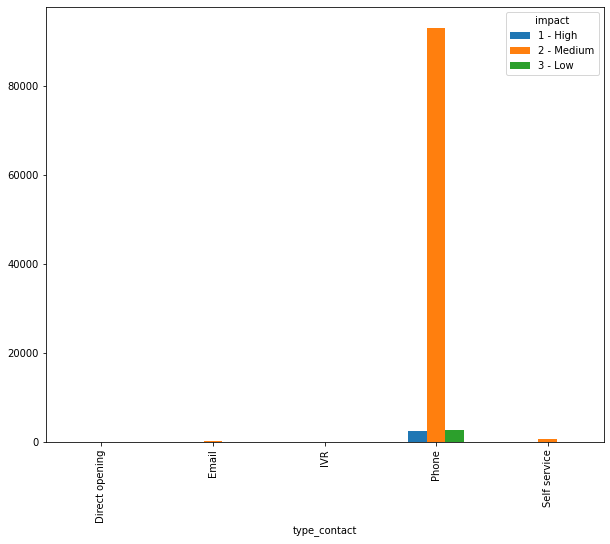

In [370]:
pd.crosstab(train_df.type_contact, train_df.impact).plot(kind="bar",
                                                         figsize=(10,8));

* The above plot shows that most of the incidents were reported through phone only, so this can be one of the important attribute for the model to learn.

In [371]:
train_df["location"].value_counts()

Location 204    22295
Location 161    15867
Location 143    13463
Location 108     8870
Location 93      7980
                ...  
Location 211        2
Location 166        1
Location 181        1
Location 132        1
Location 203        1
Name: location, Length: 225, dtype: int64

In [372]:
len(train_df["category_ID"].value_counts())

57

In [373]:
pd.crosstab(train_df.category_ID, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
category_ID,,,
?,5,46,5
Category 10,0,21,0
Category 12,0,1,0
Category 13,24,655,16
Category 14,0,3,0
Category 15,0,2,0
Category 16,0,4,0
Category 17,36,300,15
Category 19,154,927,14


* Since few of values in **category_ID** is having no value, so we will remove these rows from our data as it is only having a small amount of data.

In [374]:
train_df = train_df.loc[train_df["category_ID"] != '?']
len(train_df)

99142

* Let's see the **category_ID** column values again

In [375]:
pd.crosstab(train_df.category_ID, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
category_ID,,,
Category 10,0,21,0
Category 12,0,1,0
Category 13,24,655,16
Category 14,0,3,0
Category 15,0,2,0
Category 16,0,4,0
Category 17,36,300,15
Category 19,154,927,14
Category 2,0,58,0


In [376]:
train_df["user_symptom"].value_counts()

Symptom 491    36496
?              23083
Symptom 534     3852
Symptom 387     1809
Symptom 4       1794
               ...  
Symptom 80         1
Symptom 243        1
Symptom 313        1
Symptom 326        1
Symptom 407        1
Name: user_symptom, Length: 516, dtype: int64

* Since **user_symptom** column has too many unknown values, so we are dropping this column from our dataframe as it may not help during model training.

In [377]:
train_df = train_df.drop("user_symptom",axis=1)


In [378]:
train_df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'opened_time', 'Created_by', 'created_at',
       'updated_by', 'updated_at', 'type_contact', 'location', 'category_ID',
       'Support_group', 'Doc_knowledge', 'confirmation_check', 'impact',
       'notify'],
      dtype='object')

In [379]:
train_df["Support_group"].value_counts()

Group 70    30344
?            9966
Group 25     5421
Group 24     4717
Group 20     4293
            ...  
Group 7         4
Group 4         1
Group 38        1
Group 41        1
Group 11        1
Name: Support_group, Length: 78, dtype: int64

* Since this column **Support_group** is also having almost 10000 null values, so we dropping thsi column from our database.

In [380]:
train_df = train_df.drop("Support_group", axis=1)
len(train_df.columns)

19

In [381]:
train_df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'opened_time', 'Created_by', 'created_at',
       'updated_by', 'updated_at', 'type_contact', 'location', 'category_ID',
       'Doc_knowledge', 'confirmation_check', 'impact', 'notify'],
      dtype='object')

In [382]:
train_df["Doc_knowledge"].value_counts()

False    81366
True     17776
Name: Doc_knowledge, dtype: int64

In [383]:
pd.crosstab(train_df.Doc_knowledge, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
Doc_knowledge,,,
False,1941,77776,1649
True,498,16212,1066


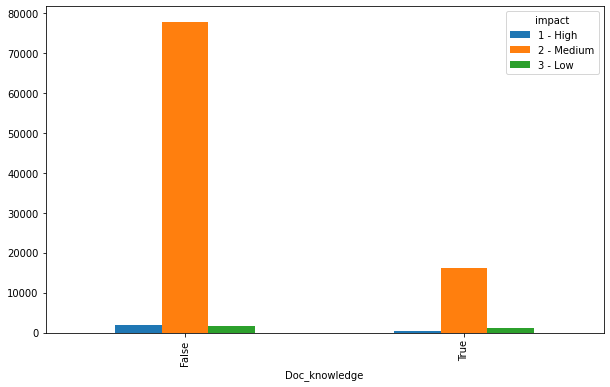

In [384]:
pd.crosstab(train_df.Doc_knowledge, train_df.impact).plot(kind="bar", figsize=(10,6));

* In the above plot, we can visualize that in most cases **Knowledge Document** was not attached with the incident while resolving.

In [385]:
train_df["confirmation_check"].value_counts()

False    70472
True     28670
Name: confirmation_check, dtype: int64

In [386]:
pd.crosstab(train_df.confirmation_check, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
confirmation_check,,,
False,1524,66868,2080
True,915,27120,635


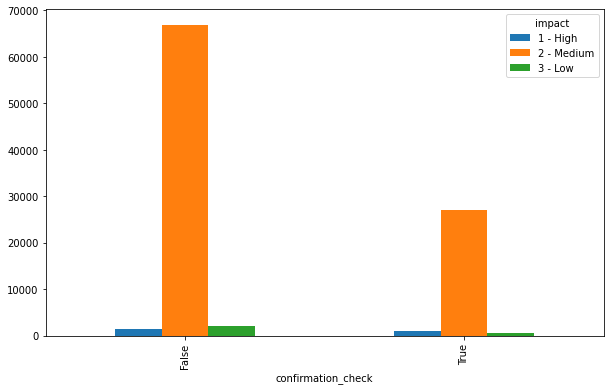

In [387]:
pd.crosstab(train_df.confirmation_check, train_df.impact).plot(kind="bar", figsize=(10,6));

* The above plot indicates that most of the incidents priority field was not doubly checked.

In [388]:
train_df.notify.value_counts()

Do Not Notify    99057
Send Email          85
Name: notify, dtype: int64

In [389]:
pd.crosstab(train_df.notify, train_df.impact)

impact,1 - High,2 - Medium,3 - Low
notify,,,
Do Not Notify,2439,93903,2715
Send Email,0,85,0


* The above incident shows that almost no notifications were generated for the incident.

In [390]:
train_df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'opened_time', 'Created_by', 'created_at',
       'updated_by', 'updated_at', 'type_contact', 'location', 'category_ID',
       'Doc_knowledge', 'confirmation_check', 'impact', 'notify'],
      dtype='object')

### Lastly, we have find the relevant attributes in our data for the model to be trained. so our Exploratory Data Analysis part is completed here.

### Find a correlation matrix between our features.

In [391]:
corr_matrix = train_df.corr()
corr_matrix

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check
active,1.000000,0.046268,0.016876,-0.095434,0.045690,-0.487721
count_reassign,0.046268,1.000000,0.164719,0.528759,0.082575,-0.002003
count_opening,0.016876,0.164719,1.000000,0.254539,0.008394,0.131029
count_updated,-0.095434,0.528759,0.254539,1.000000,0.065101,0.185530
Doc_knowledge,0.045690,0.082575,0.008394,0.065101,1.000000,-0.222268
confirmation_check,-0.487721,-0.002003,0.131029,0.185530,-0.222268,1.000000


In [392]:
import seaborn as sns

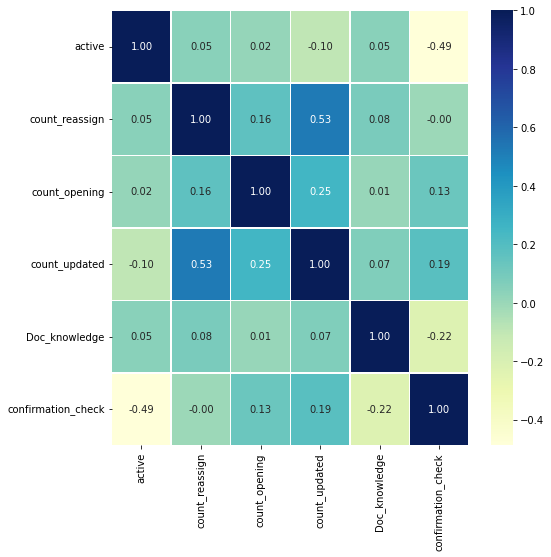

In [394]:
# let's make our correlation matrix more prettier
corr_matrix = train_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

## Modelling with the data.

In [395]:
train_df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 804,29-02-2016 11:29,Phone,Location 143,Category 55,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,True,False,2 - Medium,Do Not Notify


### Splitting our dataset Features and Labels.

In [396]:
X = train_df.drop("impact", axis=1)
y = train_df["impact"]

* Checking for Null values in our dataset once again.

In [397]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99142 entries, 0 to 99197
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  99142 non-null  object
 1   ID_status           99142 non-null  object
 2   active              99142 non-null  bool  
 3   count_reassign      99142 non-null  int64 
 4   count_opening       99142 non-null  int64 
 5   count_updated       99142 non-null  int64 
 6   opened_by           99142 non-null  object
 7   opened_time         99142 non-null  object
 8   Created_by          99142 non-null  object
 9   created_at          99142 non-null  object
 10  updated_by          99142 non-null  object
 11  updated_at          99142 non-null  object
 12  type_contact        99142 non-null  object
 13  location            99142 non-null  object
 14  category_ID         99142 non-null  object
 15  Doc_knowledge       99142 non-null  bool  
 16  confirmation_check  99

* Dropping the column with minimum impact on the label as they are having very large categories making it difficult fot modle to learn patterns from that data.

In [398]:
X = X.drop(['opened_time','created_at','opened_by','Created_by','updated_by','updated_at','ID','location'],axis=1)

In [399]:
X.columns

Index(['ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'type_contact', 'category_ID', 'Doc_knowledge',
       'confirmation_check', 'notify'],
      dtype='object')

* Getting our categorical data in one-hot encoded form.

In [400]:
X = pd.get_dummies(X)
X[:5]

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check,ID_status_-100,ID_status_Active,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,...,category_ID_Category 59,category_ID_Category 6,category_ID_Category 61,category_ID_Category 62,category_ID_Category 63,category_ID_Category 7,category_ID_Category 8,category_ID_Category 9,notify_Do Not Notify,notify_Send Email
0,True,0,0,0,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,True,0,0,3,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,False,0,0,4,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,True,1,0,1,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,True,1,0,2,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


* Converting boolean-data into one-hot encoded form.

In [401]:
X.confirmation_check = X.confirmation_check.replace({True: 1, False: 0})
X.active = X.active.replace({True: 1, False: 0})
X.Doc_knowledge = X.Doc_knowledge.replace({True: 1, False: 0})
X[:5]

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check,ID_status_-100,ID_status_Active,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,...,category_ID_Category 59,category_ID_Category 6,category_ID_Category 61,category_ID_Category 62,category_ID_Category 63,category_ID_Category 7,category_ID_Category 8,category_ID_Category 9,notify_Do Not Notify,notify_Send Email
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


* Changing the label datatype from **object** to **category** to convert it into label encoders.

In [402]:
y = y.astype('category')
y = y.cat.codes

In [403]:
len(y.loc[y == 2])

2715

* Defining Class-names

In [431]:
classnames = ['1 - High', '2 - Medium', '3 - Low']

### Splitting our dataset into training and test sets

In [405]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79313, 78), (19829, 78), (79313,), (19829,))

In [406]:
X = tf.convert_to_tensor(X)

## Creating, Compiling and Fitting Model architecture.

* Here we will be working with Neural Network :
 

In [407]:
y = tf.squeeze(tf.cast(y, dtype=tf.int32))
y[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>

In [408]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(400, activation="relu"),
      tf.keras.layers.Dense(200, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(20, activation="relu"),
      tf.keras.layers.Dense(3, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X_train,y_train,
            epochs=50,
            validation_data=(X_test, y_test),
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
2479/2479 [==============================] - 10s 4ms/step - loss: 0.2226 - accuracy: 0.9480 - val_loss: 0.2143 - val_accuracy: 0.9476
Epoch 2/50
2479/2479 [==============================] - 9s 3ms/step - loss: 0.2071 - accuracy: 0.9495 - val_loss: 0.2125 - val_accuracy: 0.9494
Epoch 3/50
2479/2479 [==============================] - 9s 4ms/step - loss: 0.2018 - accuracy: 0.9505 - val_loss: 0.2059 - val_accuracy: 0.9496
Epoch 4/50
2479/2479 [==============================] - 8s 3ms/step - loss: 0.1993 - accuracy: 0.9503 - val_loss: 0.1989 - val_accuracy: 0.9501
Epoch 5/50
2479/2479 [==============================] - 9s 4ms/step - loss: 0.1972 - accuracy: 0.9508 - val_loss: 0.1976 - val_accuracy: 0.9502
Epoch 6/50
2479/2479 [==============================] - 9s 4ms/step - loss: 0.1948 - accuracy: 0.9508 - val_loss: 0.1966 - val_accuracy: 0.9504
Epoch 7/50
2479/2479 [==============================] - 12s 5ms/step - loss: 0.1930 - accuracy: 0.9509 - val_loss: 0.1976 - val_accurac

In [409]:
model_1.evaluate(X_test, y_test)

620/620 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.9489


[0.19924840331077576, 0.9488627910614014]

## Check our model accuracy on test set.

In [410]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Incident_management_test_data.csv")
test_df.head()

,S.No,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_ID,change_request
0,1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29-02-2016 01:16,...,Location 143,Category 55,Symptom 72,Group 56,?,True,False,Do Not Notify,?,?
1,2,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 70,Resolver 89,True,False,Do Not Notify,?,?
2,3,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,Do Not Notify,?,?
3,4,INC0000047,Resolved,True,1,0,7,Caller 2403,Opened by 397,29-02-2016 04:40,...,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,Do Not Notify,?,?
4,5,INC0000057,New,True,0,0,4,Caller 4416,Opened by 8,29-02-2016 06:10,...,Location 204,Category 20,Symptom 471,Group 70,?,True,False,Do Not Notify,Problem ID 2,?


'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'type_contact', 'location', 'category_ID',
       'Doc_knowledge', 'confirmation_check', 'notify'

In [411]:
test_df.columns

Index(['S.No', 'ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
       'created_at', 'updated_by', 'updated_at', 'type_contact', 'location',
       'category_ID', 'user_symptom', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'confirmation_check', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

In [413]:
test_df = test_df.drop(['ID','ID_caller','opened_by','opened_time','Created_by','created_at','updated_by','updated_at','user_symptom','Support_group','support_incharge','problem_ID','change_request','location'], axis=1)
test_df.head()

,S.No,ID_status,active,count_reassign,count_opening,count_updated,type_contact,category_ID,Doc_knowledge,confirmation_check,notify
0,1,Resolved,True,0,0,2,Phone,Category 55,True,False,Do Not Notify
1,2,New,True,0,0,0,Phone,Category 40,True,False,Do Not Notify
2,3,Active,True,1,0,3,Phone,Category 40,True,False,Do Not Notify
3,4,Resolved,True,1,0,7,Phone,Category 40,True,False,Do Not Notify
4,5,New,True,0,0,4,Phone,Category 20,True,False,Do Not Notify


In [414]:
test_df = pd.get_dummies(test_df)
test_df[:5]

,S.No,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check,ID_status_-100,ID_status_Active,ID_status_Awaiting Evidence,...,category_ID_Category 59,category_ID_Category 6,category_ID_Category 61,category_ID_Category 62,category_ID_Category 63,category_ID_Category 7,category_ID_Category 8,category_ID_Category 9,notify_Do Not Notify,notify_Send Email
0,1,True,0,0,2,True,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,True,0,0,0,True,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,True,1,0,3,True,False,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,True,1,0,7,True,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,True,0,0,4,True,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [415]:
test_df = test_df.drop("S.No", axis=1)
test_df[:5]

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check,ID_status_-100,ID_status_Active,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,...,category_ID_Category 59,category_ID_Category 6,category_ID_Category 61,category_ID_Category 62,category_ID_Category 63,category_ID_Category 7,category_ID_Category 8,category_ID_Category 9,notify_Do Not Notify,notify_Send Email
0,True,0,0,2,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,True,0,0,0,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,True,1,0,3,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,True,1,0,7,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,True,0,0,4,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [416]:
test_df.confirmation_check = test_df.confirmation_check.replace({True: 1, False: 0})
test_df.active = test_df.active.replace({True: 1, False: 0})
test_df.Doc_knowledge = test_df.Doc_knowledge.replace({True: 1, False: 0})
test_df[:5]

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check,ID_status_-100,ID_status_Active,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,...,category_ID_Category 59,category_ID_Category 6,category_ID_Category 61,category_ID_Category 62,category_ID_Category 63,category_ID_Category 7,category_ID_Category 8,category_ID_Category 9,notify_Do Not Notify,notify_Send Email
0,1,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [417]:
X_train.shape, test_df.shape

((79313, 78), (42514, 79))

In [418]:
for i in range(len(X_train.columns)):
  if X_train.columns[i] == test_df.columns[i] :
    continue
  else:
    print(i)
    break

20


In [421]:
X_train.columns[20], test_df.columns[20]

('category_ID_Category 10', 'category_ID_?')

In [422]:
test_df = test_df.drop("category_ID_?", axis=1)
test_df.shape

(42514, 78)

In [424]:
test_tensor = tf.convert_to_tensor(test_df)
test_tensor

<tf.Tensor: shape=(42514, 78), dtype=int64, numpy=
array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])>

In [426]:
pred_probs = model_1.predict(test_df)

In [434]:
predictions = np.argmax(pred_probs, axis=1)
pred_list = []
for i in range(len(predictions)):
  pred_list.append(classnames[predictions[i]])

pred_list[:5]


['2 - Medium', '2 - Medium', '2 - Medium', '2 - Medium', '1 - High']

In [437]:
serial_list = []

for i in range(1,42515):
  serial_list.append(i)


serial_list[:5]


[1, 2, 3, 4, 5]

In [440]:
final_df = pd.DataFrame(list(zip(serial_list, pred_list)),
               columns =['ID', 'prediction1'])
final_df.head(10)

,ID,prediction1
0,1,2 - Medium
1,2,2 - Medium
2,3,2 - Medium
3,4,2 - Medium
4,5,1 - High
5,6,2 - Medium
6,7,2 - Medium
7,8,2 - Medium
8,9,2 - Medium
9,10,2 - Medium


In [443]:
final_df.to_csv("/content/drive/MyDrive/Colab Notebooks/incident_impact_prediction.csv")